In [2]:
import numpy as np
import pandas as pd
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
from datahandler import ppg_preprocessing,ppg_data,visualize_ppg_data, average_sequential



In [3]:
data_files = glob.glob('C:/Users/rehma/OneDrive/Desktop/Data File/processed/*.csv')
clinical_data = pd.read_excel('C:/Users/rehma/OneDrive/Desktop/Data File/clinical_data.xlsx')

labels=[]
features = []
for i in clinical_data['Labels']:
    labels.append(i)
    
for data_paths in data_files:
    figure = ppg_data(data_paths,1000)
    features.append(figure)

a=0 
averaged_list = []
new_features=[]
for i in range(len(features)):
    if a<3:
        averaged_list.append(features[i])
        a+=1
    if a==3:
        averaged_array = np.mean([averaged_list[0], averaged_list[1], averaged_list[2]], axis=0)
        new_features.append(averaged_array)
        averaged_list=[]
        a=0
    
    

flattened_data = [item.flatten() for item in new_features]

features = np.array(flattened_data)
labels= np.array(labels)
labels = keras.utils.to_categorical(labels, 4)

In [4]:
x_train, x_test,y_train,y_test=train_test_split(features,labels,random_state=16, test_size=0.10, stratify=labels)
x_train,x_val, y_train,y_val = train_test_split(x_train, y_train,random_state=16, test_size=0.10, stratify=y_train)
# Define the model
model = Sequential()

# Add a Flatten layer if your input is 2D (e.g., a 2D array where one dimension is time and the other is features)
model.add(Input(shape=(2000,1)))  # Flatten a 2D input to 1D (1000 samples per PPG segment)
# Add a 1D convolutional layer for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))  # Downsample the features

# Add another Conv1D layer for deeper feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())
# Add fully connected (dense) layers
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.4))  # Dropout for regularization
# Output layer for binary classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

val=model.fit(x=x_train, y=y_train, batch_size=8, shuffle=True, epochs=10,validation_data=(x_val,y_val))
model.evaluate(x_test,y_test)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3430 - loss: 1.3416 - val_accuracy: 0.3500 - val_loss: 1.2692
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4148 - loss: 1.2464 - val_accuracy: 0.4500 - val_loss: 1.2684
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4431 - loss: 1.2745 - val_accuracy: 0.4500 - val_loss: 1.2829
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3785 - loss: 1.3380 - val_accuracy: 0.4500 - val_loss: 1.2782
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4796 - loss: 1.2135 - val_accuracy: 0.5000 - val_loss: 1.2774
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4643 - loss: 1.2075 - val_accuracy: 0.3000 - val_loss: 1.2753
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3972 - loss: 1.2089 - val_accuracy: 0.4000 - val_loss: 1.2753
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4335 - loss: 1.2313 - val_accuracy: 0.4000 - v

[1.263811469078064, 0.22727273404598236]

In [7]:
#model.save('Data File/PPG_Prediction_Model1.keras')

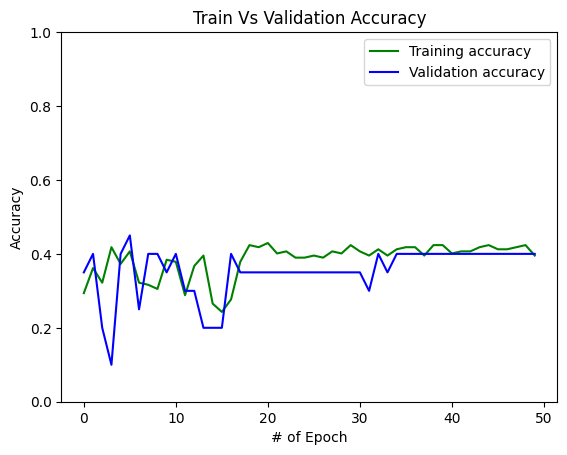

In [40]:
plt.plot(val.history['accuracy'], color='g')
plt.plot(val.history['val_accuracy'], color='b')
plt.legend(['Training accuracy' ,'Validation accuracy'])
plt.title("Train Vs Validation Accuracy")
plt.xlabel("# of Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.00,1)
plt.show()



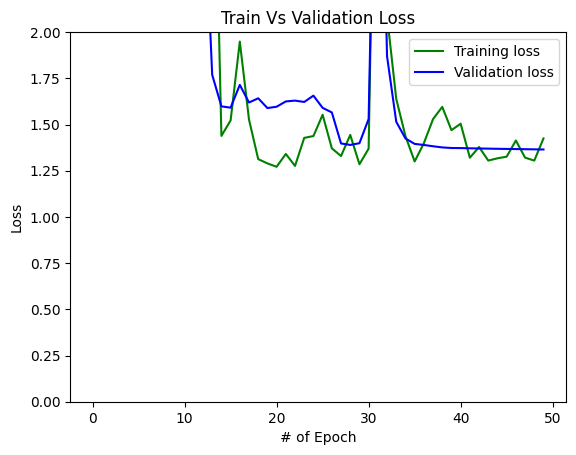

In [41]:

plt.plot(val.history['loss'], color='g')
plt.plot(val.history['val_loss'], color='b')
plt.legend(['Training loss' ,'Validation loss'])
plt.title("Train Vs Validation Loss")
plt.xlabel("# of Epoch")
plt.ylabel("Loss")
plt.ylim(0.00,2.00) 
plt.show()

In [10]:
pre_loaded_model= tf.keras.models.load_model(r'C:\Users\rehma\OneDrive\Desktop\Data File\PPG_Prediction_Model1.keras')